# Аттестация по модулю 4

Загрузим данные непосредственно из задания (по ссылке).

In [21]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
link = 'https://studio.dc-edu.itmo.ru/assets/courseware/v1/431a30c4a3a2b3f265f8cce1a809aa0f/asset-v1:ITMOUniversity+DATSC+summer_2022_1+type@asset+block/pulsar_stars_new.csv'
stars = pd.read_csv(link)

Убедимся, что данные загружены корректно

In [22]:
stars.head()

,MIP,STDIP,EKIP,SIP,MC,STDC,EKC,SC,TG
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


Отделим предикторы от откликов

In [23]:
X = stars.iloc[:,:-1]
y = stars.iloc[:,-1]

Разделим данные на тренировочную и тестовую части при помощи функции `train_test_split()` из библиотеки `sklearn`.

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

Произведем нормировку тренировочного набора данных при помощи `StandardScaler()` из библиотеки `sklearn`.

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

Построим и обучим классификатор на основе `MLPClassifier`из библиотеки `sklearn`.

In [26]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=9, max_iter=1000, hidden_layer_sizes=(10,5,4))
clf.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(10, 5, 4), max_iter=1000, random_state=9)

Выполним предсказания для тестового набора данных, предварительно применив преобразование нормировки, полученное в процессе нормировки обучающей выборки.

In [27]:
X_test_scaled = scaler.transform(X_test)
y_pred = clf.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Посмотрим метрики качества модели, полученные на тестовом наборе данных при помощи `classification_report()` из библиотеки `sklearn`.

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.988     0.991     0.989      3276
           1      0.901     0.868     0.884       304

    accuracy                          0.981      3580
   macro avg      0.944     0.930     0.937      3580
weighted avg      0.980     0.981     0.981      3580



In [29]:
from sklearn.metrics import roc_auc_score
probs_1 = clf.predict_proba(X_test_scaled)[:,1]
roc_auc_score(y_test, probs_1)

0.9792881643210591

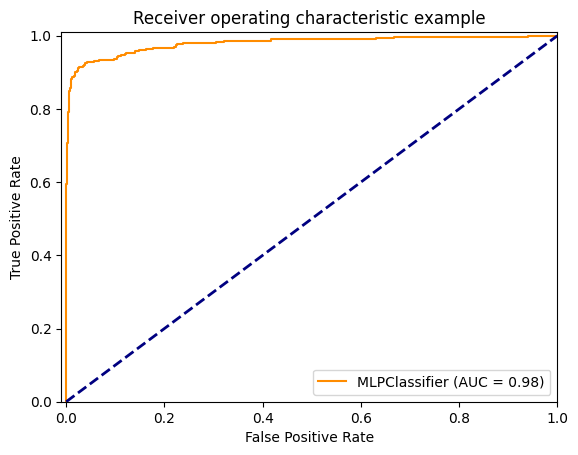

In [30]:
import matplotlib.pyplot as plt
from sklearn import metrics
metrics.plot_roc_curve(clf, X_test_scaled, y_test, color='darkorange') 
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()